<div style="color:#D81F26;
           display:fill;
           border-style: solid;
           border-color:#C1C1C1;
           font-size:14px;
           font-family:Calibri;
           background-color:#373737;">
<h2 style="text-align: center;
           padding: 10px;
           color:#FFFFFF;">
======= CNN for Chest Pneumonia  =======
</h2>
</div>

<img src="https://buzzrx.s3.amazonaws.com/42d4a37c-bea8-481a-9596-114e5d379c87/StagesofPnemonia.png" length=700 width=700>

# 1. About this notebook
Convolutional Neural Networks (CNNs) have shown great effectiveness in solving various computer vision tasks, including image classification for chest X-ray images for pneumonia classification.
<br><br>
Pneumonia is a common and potentially life-threatening lung infection. The challenge in diagnosing pneumonia lies in accurately identifying the regions of the X-ray images that indicate the presence of pneumonia. This is where CNNs excel.
<br><br>
The advantage of using CNNs for pneumonia classification is their ability to automatically learn and capture intricate patterns and structures in the X-ray images without the need for manual feature engineering. This makes them highly effective in handling complex image data and achieving accurate pneumonia detection.
<br><br>
In this notebooks, we are going to demostrate how to use different CNN architectures to train CNN models and compare their comparison. 

## 1.1. CNN Architectures
Here are a few different CNN architectures that you can consider for training and performance comparison

1. <b>VGG16</b> - The VGG16 architecture consists of 16 convolutional layers with small 3x3 filters followed by max pooling layers. It is a very simple, effective CNN model for image classification tasks. It is a widely-used baseline for comparison benchmarkingin various image classification tasks.
<br><br>
2. <b>MobileNetV2</b> - The MobileNetV2 architecture is designed for efficient inference on mobile and embedded devices. It uses depthwise separable convolutions to reduce the number of parameters and computations. MobileNetV2 offers a good balance between accuracy and computational efficiency.
<br><br>
3. <b>DenseNet</b> - The DenseNet architecture introduces dense connections, where each layer is connected to every other layer in a feed-forward manner. Dense connections facilitate feature reuse, promote gradient flow, and alleviate the vanishing gradient problem. DenseNet has achieved competitive results on image classification tasks and is known for its parameter efficiency.
<br><br>
4. <b>InceptionV3</b> - The InceptionV3 architecture utilizes a combination of convolutional layers with different filter sizes to capture features at multiple scales. It includes the Inception module, which performs parallel convolutions with different filter sizes and concatenates their outputs. InceptionV3 has shown strong performance on image classification tasks, especially for complex datasets.

The outperfomring CNN architecture is selected for fine-tunning training.  

## 1.2. Library Setup 

In [1]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Class weight calculation
from sklearn.utils.class_weight import compute_class_weight

# Keras library 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from keras import regularizers
from keras.callbacks import ReduceLROnPlateau

# Different CNN Model
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, MobileNetV2, DenseNet121

# To chain two different data augmented images for training
from itertools import chain

#  Distributed Computing
import tensorflow as tf


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

## 1.3 Parameter Setup for Model Training

In [2]:
BATCH_SIZE = 48

image_height = 299
image_width = 299

# 2. Image Augmentation

<div style=" background-color:#4b371c;text-align:left; padding: 13px 13px; border-radius: 8px; color: white; font-size: 16px">
Image augmentation is a technique used in convolutional neural networks (CNNs) to artificially increase the size of the training dataset by applying various transformations to the original images. It is primarily used to prevent overfitting and improve the generalization capability of CNN models.
<br><br>
By applying these transformations, the augmented images have variations in their appearance, while still retaining the essential features of the original images. This helps the model generalize better to unseen data and reduces the risk of overfitting.
</div>

In [3]:
# Data agumentation and pre-processing using tensorflow
data_generator_1 = ImageDataGenerator(
                            rescale=1./255,
                            rotation_range=5,
                            width_shift_range=0.05,
                            height_shift_range=0.05,
                            shear_range=0.05,
                            zoom_range=0.05,
                            brightness_range = [0.95,1.05],
                            horizontal_flip=False,
                            vertical_flip=False,
                            fill_mode='nearest'                                   
                        )

print('Data Augmentation 1 was created')

data_generator_2 = ImageDataGenerator(
                            rescale=1./255,
                            rotation_range=10,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.1,
                            zoom_range=0.1,
                            brightness_range = [0.9,1.1],
                            horizontal_flip=False,
                            vertical_flip=False,
                            fill_mode='nearest'                                   
                        )
print('Data Augmentation 2 was created')

data_generator_3 = ImageDataGenerator (rescale=1./255)

Data Augmentation 1 was created
Data Augmentation 2 was created


In [4]:
train_generator1 = data_generator_1.flow_from_directory(
    directory = "/kaggle/input/chest-xray-pneumonia/chest_xray/train", # images data path / folder in which images are there
    color_mode = "rgb",
    target_size = (image_height, image_width), # image height , image width
    class_mode = "categorical",
    batch_size = BATCH_SIZE,
    shuffle = True,
    seed = 42)

print('Data Augmentation 1 was used to generate train data set\n')

# train_generator2 = data_generator_2.flow_from_directory(
#     directory = "/kaggle/input/chest-xray-pneumonia/chest_xray/train", # images data path / folder in which images are there
#     color_mode = "rgb",
#     target_size = (image_height, image_width), # image height , image width
#     class_mode = "categorical",
#     batch_size = BATCH_SIZE,
#     shuffle = True,
#     seed = 42)

# print('Data Augmentation 2 was used to generate train data set\n')

# train_generator3 = data_generator_3.flow_from_directory(
#     directory = "/kaggle/input/chest-xray-pneumonia/chest_xray/train", # images data path / folder in which images are there
#     color_mode = "rgb",
#     target_size = (image_height, image_width), # image height , image width
#     class_mode = "categorical",
#     batch_size = BATCH_SIZE,
#     shuffle = True,
#     seed = 42)

# print('Original images was used to generate train data set\n')

test_generator = data_generator_3.flow_from_directory(
    directory = "/kaggle/input/chest-xray-pneumonia/chest_xray/test", # images data path / folder in which images are there
    color_mode = "rgb",
    target_size = (image_height, image_width), # image height , image width
    class_mode = "categorical",
    batch_size = BATCH_SIZE,
    shuffle = True,
    seed = 42)


# val_generator = data_generator_3.flow_from_directory(
#     directory = "/kaggle/input/chest-xray-pneumonia/chest_xray/val", # images data path / folder in which images are there
#     color_mode = "rgb",
#     target_size = (image_height, image_width), # image height , image width
#     class_mode = "categorical",
#     batch_size = BATCH_SIZE,
#     shuffle = True,
#     seed = 42)

Found 5216 images belonging to 2 classes.
Data Augmentation 1 was used to generate train data set

Found 624 images belonging to 2 classes.


# 3. EDA

## 3.1 Distribution of Class Label

<div style=" background-color:#b22222;text-align:left; padding: 13px 13px; border-radius: 8px; color: white; font-size: 16px">
To identify if the dataset suffers from class imbalance, where the number of instances in different classes is significantly different. Class imbalance can lead to biased learning and poor performance, especially for the minority class.
</div>

In [5]:
dict_class = train_generator1.class_indices
print('Dictionary: {}'.format(dict_class))
class_names = list(dict_class.keys())  # storing class/breed names in a list
print('Class labels: {}'.format(class_names))

Dictionary: {'NORMAL': 0, 'PNEUMONIA': 1}
Class labels: ['NORMAL', 'PNEUMONIA']


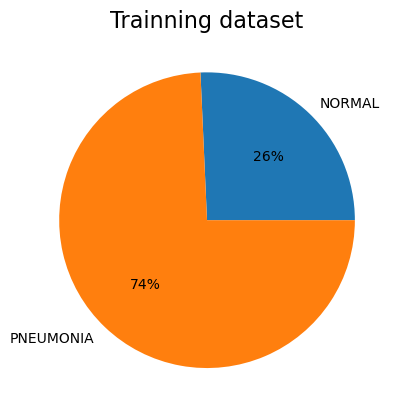

In [6]:
frequency = np.unique(train_generator1.classes, return_counts=True)

plt.title("Trainning dataset", fontsize='16')
plt.pie(frequency[1], labels = class_names, autopct='%1.0f%%');

In [7]:
# Dataset characteristics
print("Dataset Characteristics of Train Data Set:")
print("Number of images:", len(train_generator1.classes))
print("Number of normal images:", len([label for label in train_generator1.classes if label == 0]))
print("Number of pneumonia images:", len([label for label in train_generator1.classes if label == 1]))
print()

print("Dataset Characteristics of Test Data Set:")
print("Number of images:", len(test_generator.classes))
print("Number of normal images:", len([label for label in test_generator.classes if label == 0]))
print("Number of pneumonia images:", len([label for label in test_generator.classes if label == 1]))
print()

# print("Dataset Characteristics of Validation Data Set:")
# print("Number of images:", len(val_generator.classes))
# print("Number of normal images:", len([label for label in val_generator.classes if label == 0]))
# print("Number of pneumonia images:", len([label for label in val_generator.classes if label == 1]))
# print()

Dataset Characteristics of Train Data Set:
Number of images: 5216
Number of normal images: 1341
Number of pneumonia images: 3875

Dataset Characteristics of Test Data Set:
Number of images: 624
Number of normal images: 234
Number of pneumonia images: 390



## 3.2 Class Weights

<div style=" background-color:#b22222;text-align:left; padding: 13px 13px; border-radius: 8px; color: white; font-size: 16px">
The purpose of class weights is to address class imbalance in the dataset during training. The weights are used to adjust the contribution of each class to the overall loss function and gradient calculation during backpropagation. By assigning higher weights to the minority class and lower weights to the majority class, the model gives more importance to correctly classifying instances from the minority class.
</div>

In [8]:
class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(train_generator1.classes), y= train_generator1.classes)
class_weights = dict(zip(np.unique(train_generator1.classes), class_weights))
class_weights

{0: 1.9448173005219984, 1: 0.6730322580645162}

## 3.3 Image Samples

Train image data from Data Augmentation 1


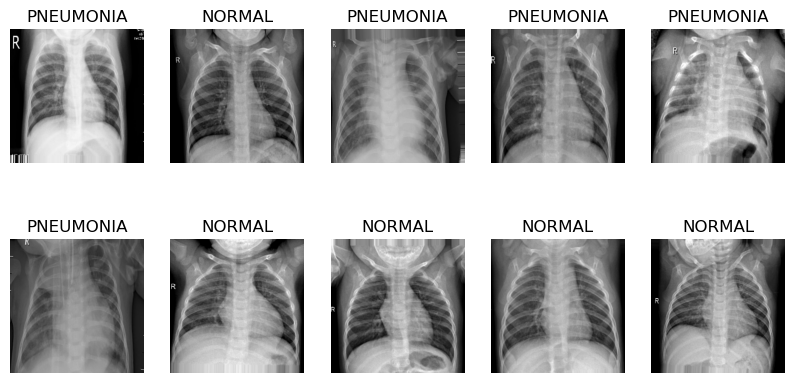

In [9]:
print('Train image data from Data Augmentation 1')
img, label = next(train_generator1)
# print(len(label))

plt.figure(figsize=[10, 5])
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(img[i])
    plt.axis('off')
    plt.title(class_names[np.argmax(label[i])])    
plt.show()
    
# print('Train image data from Data Augmentation 2')
# img, label = next(train_generator2)

# plt.figure(figsize=[10, 4])
# for i in range(10):
#     plt.subplot(2, 5, i+1)
#     plt.imshow(img[i])
#     plt.axis('off')
#     plt.title(class_names[np.argmax(label[i])])       
# plt.show()    

# print('Train image data from Original Image')
# img, label = next(train_generator3)

# plt.figure(figsize=[10, 4])
# for i in range(10):
#     plt.subplot(2, 5, i+1)
#     plt.imshow(img[i])
#     plt.axis('off')
#     plt.title(class_names[np.argmax(label[i])])       
# plt.show()   

# 4. Convolutional neural networks (CNNs)

<div style=" background-color:#4b371c;text-align:left; padding: 13px 13px; border-radius: 8px; color: white; font-size: 16px">
CNN (Convolutional Neural Network) model is a type of deep learning model commonly used for processing and analyzing visual data, such as images. It is particularly effective in tasks such as image classification, object detection, and image segmentation.  They consist of multiple interconnected layers that learn to extract and represent hierarchical patterns and features from input images. 

</div>

In [10]:
# Define the epochs for training 
EPOCHS = 2

# Define the number of GPUs to use
num_gpus = 2

# Merge augmented image data for training
# merged_train_generator = chain(train_generator1, train_generator2, train_generator3)

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, verbose=1, restore_best_weights=True)

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.001, patience=10, verbose=1)

# For development purpose, we first limit the train data set to the original image data set
# train_data = merged_train_generator
# train_data = train_generator1
train_data = train_generator1
# train_data = test_generator

# 4.1. VGG16
<div style=" background-color:#b22222;text-align:left; padding: 13px 13px; border-radius: 8px; color: white; font-size: 16px">
The VGG16 architecture consists of 16 convolutional layers with small 3x3 filters followed by max pooling layers.  It is a very simple, effective CNN model for image classification tasks.  It is a widely-used baseline for comparison benchmarkingin various image classification tasks.
</div>

In [11]:
# Create a MirroredStrategy
strategy = tf.distribute.MirroredStrategy(devices=['/gpu:0', '/gpu:1'])

# Open a strategy scope
with strategy.scope():
    
    # Load the pre-trained VGG16 model without the top classification layer
    base_model_VGG16 = VGG16(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

    # Set the layers of the base model as non-trainable (freeze them)
    for layer in base_model_VGG16.layers:
        layer.trainable = False
    
    # Create a new model and add the VGG16 base model
    model_VGG16 = Sequential()
    model_VGG16.add(base_model_VGG16)

    # Add a fully connected layer and output layer for classification
    model_VGG16.add(GlobalAveragePooling2D())
    model_VGG16.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    model_VGG16.add(Dropout(0.4))
    model_VGG16.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    model_VGG16.add(Dropout(0.2))
    model_VGG16.add(Dense(2, activation='softmax'))

    # Model summary
    print("Model Summary (VGG16):")
    model_VGG16.summary()
    print()

    # Compile the model
    model_VGG16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history_VGG16 = model_VGG16.fit(train_data, epochs=EPOCHS, validation_data=test_generator, callbacks=[early_stopping], class_weight=class_weights)

    # Validate the model
    val_loss_VGG16, val_accuracy_VGG16 = model_VGG16.evaluate(test_generator, steps=len(test_generator))
    print(f'Validation Loss: {val_loss_VGG16:.4f}')
    print(f'Validation Accuracy: {val_accuracy_VGG16:.4f}')

58889256/58889256 [==============================] - 0s 0us/step
Model Summary (VGG16):
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 9, 9, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None

# 4.2. MobileNetV2
<div style=" background-color:#b22222;text-align:left; padding: 13px 13px; border-radius: 8px; color: white; font-size: 16px">
The MobileNetV2 architecture is designed for efficient inference on mobile and embedded devices. It uses depthwise separable convolutions to reduce the number of parameters and computations. MobileNetV2 offers a good balance between accuracy and computational efficiency.
</div>

In [12]:
# Create a MirroredStrategy
strategy = tf.distribute.MirroredStrategy(devices=['/gpu:0', '/gpu:1'])

# Open a strategy scope
with strategy.scope():
    
    # Load the pre-trained MobileNetV2 model without the top classification layer
    base_model_MobileNet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

    # Set the layers of the base model as non-trainable (freeze them)
    for layer in base_model_MobileNet.layers:
        layer.trainable = False
    
    # Create a new model and add the MobileNetV2 base model
    model_MobileNet = Sequential()
    model_MobileNet.add(base_model_MobileNet)

    # Add a global average pooling layer and output layer for classification
    model_MobileNet.add(GlobalAveragePooling2D())
    model_MobileNet.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model_MobileNet.add(Dropout(0.4))
    model_MobileNet.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model_MobileNet.add(Dropout(0.2))
    model_MobileNet.add(Dense(2, activation='softmax'))

    # Model summary
    print("Model Summary (MobileNetV2):")
    model_MobileNet.summary()
    print()

    # Compile the model
    model_MobileNet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history_MobileNet = model_MobileNet.fit(train_data, epochs=EPOCHS, validation_data=test_generator, callbacks=[early_stopping], class_weight=class_weights)

    # Validate the model
    val_loss_MobileNet, val_accuracy_MobileNet = model_MobileNet.evaluate(test_generator, steps=len(test_generator))
    print(f'Validation Loss: {val_loss_MobileNet:.4f}')
    print(f'Validation Accuracy: {val_accuracy_MobileNet:.4f}')

9406464/9406464 [==============================] - 0s 0us/step
Model Summary (MobileNetV2):
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 10, 10, 1280)     2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 128)               163968    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                            

# 4.3. DenseNet
<div style=" background-color:#b22222;text-align:left; padding: 13px 13px; border-radius: 8px; color: white; font-size: 16px">
The DenseNet architecture introduces dense connections, where each layer is connected to every other layer in a feed-forward manner. Dense connections facilitate feature reuse, promote gradient flow, and alleviate the vanishing gradient problem. DenseNet has achieved competitive results on image classification tasks and is known for its parameter efficiency.
</div>

In [13]:
# Create a MirroredStrategy
strategy = tf.distribute.MirroredStrategy(devices=['/gpu:0', '/gpu:1'])

# Open a strategy scope
with strategy.scope():
    
    # Load the pre-trained DenseNet121 model without the top classification layer
    base_model_DenseNet = DenseNet121(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

    # Set the layers of the base model as non-trainable (freeze them)
    for layer in base_model_DenseNet.layers:
        layer.trainable = False  
    
    # Create a new model and add the DenseNet121 base model
    model_DenseNet = Sequential()
    model_DenseNet.add(base_model_DenseNet)

    # Add a global average pooling layer and output layer for classification
    model_DenseNet.add(GlobalAveragePooling2D())
    model_DenseNet.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model_DenseNet.add(Dropout(0.4))
    model_DenseNet.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model_DenseNet.add(Dropout(0.2))    
    model_DenseNet.add(Dense(2, activation='softmax'))

    # Model summary
    print("Model Summary (DenseNet121):")
    model_DenseNet.summary()
    print()

    # Compile the model
    model_DenseNet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history_DenseNet = model_DenseNet.fit(train_data, epochs=EPOCHS, validation_data=test_generator, callbacks=[early_stopping], class_weight=class_weights)

    # Validate the model
    val_loss_DenseNet, val_accuracy_DenseNet = model_DenseNet.evaluate(test_generator, steps=len(test_generator))
    print(f'Validation Loss: {val_loss_DenseNet:.4f}')
    print(f'Validation Accuracy: {val_accuracy_DenseNet:.4f}')

29084464/29084464 [==============================] - 0s 0us/step
Model Summary (DenseNet121):
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 9, 9, 1024)        7037504   
                                                                 
 global_average_pooling2d_2   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 128)               131200    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)      

# 4.4. InceptionV3 
<div style=" background-color:#b22222;text-align:left; padding: 13px 13px; border-radius: 8px; color: white; font-size: 16px">
The InceptionV3 architecture utilizes a combination of convolutional layers with different filter sizes to capture features at multiple scales. It includes the Inception module, which performs parallel convolutions with different filter sizes and concatenates their outputs. InceptionV3 has shown strong performance on image classification tasks, especially for complex datasets.
</div>

In [14]:
# Create a MirroredStrategy
strategy = tf.distribute.MirroredStrategy(devices=['/gpu:0', '/gpu:1'])

# Open a strategy scope
with strategy.scope():
    
    # Load the pre-trained InceptionV3 model without the top classification layer
    base_model_Inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

    # Set the layers of the base model as non-trainable (freeze them)
    for layer in base_model_Inception.layers:
        layer.trainable = False  
        
    # Create a new model and add the InceptionV3 base model
    model_Inception = Sequential()
    model_Inception.add(base_model_Inception)

    # Add a global average pooling layer and output layer for classification
    model_Inception.add(GlobalAveragePooling2D())
    model_Inception.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model_Inception.add(Dropout(0.4))
    model_Inception.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model_Inception.add(Dropout(0.2))
        
    model_Inception.add(Dense(2, activation='softmax'))

    # Model summary
    print("Model Summary (InceptionV3):")
    model_Inception.summary()
    print()

    # Compile the model
    model_Inception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model with EarlyStopping
    history_Inception = model_Inception.fit(train_data, epochs=EPOCHS, validation_data=test_generator, callbacks=[early_stopping], class_weight=class_weights)

    # Validate the model
    val_loss_Inception, val_accuracy_Inception = model_Inception.evaluate(test_generator, steps=len(test_generator))
    print(f'Validation Loss: {val_loss_Inception:.4f}')
    print(f'Validation Accuracy: {val_accuracy_Inception:.4f}')

87910968/87910968 [==============================] - 0s 0us/step
Model Summary (InceptionV3):
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_9 (Dense)             (None, 128)               262272    
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dropout_7 (Dropout)      

# 4.5. Model Performance Comparison

In [15]:
data = {
    'VGG16': val_accuracy_VGG16, 
    'MobileNet': val_accuracy_MobileNet,
    'DenseNet': val_accuracy_DenseNet,
    'Inception': val_accuracy_Inception
}


In [16]:
df = pd.DataFrame.from_dict(data, orient='index', columns=['accuracy'])
df = df.reset_index().rename(columns={'index': 'model'})

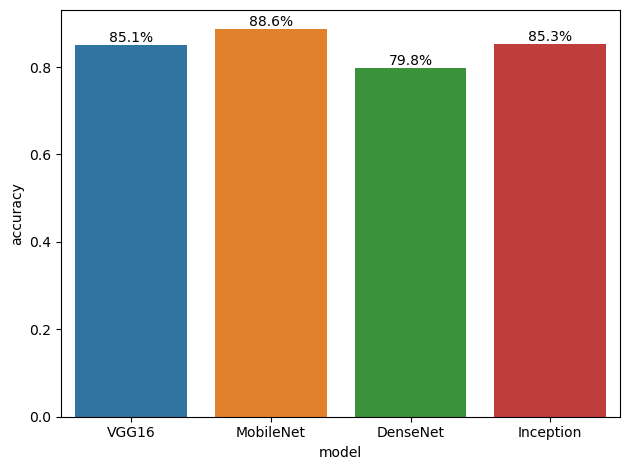

In [17]:
# Create bar chart
sns.barplot(x='model', y='accuracy', data=df)

# Add labels to bars
ax = plt.gca()
for bar in ax.containers:
    ax.bar_label(bar, label_type='edge', labels=[f"{x:.1%}" for x in bar.datavalues], fontsize=10)

# Adjust the layout
plt.tight_layout()

plt.show()

<div style=" background-color:#b22222;text-align:left; padding: 13px 13px; border-radius: 8px; color: white; font-size: 16px">
Observation and findings: When constructing each CNN architecture, we added the same number of layers to the base model and used identical regularization and dropout techniques to prevent overfitting. Our results demonstrate that Inception outperformed the other CNN architectures tested. We believe that fine-tuning the trainable layers will further enhance their performance. 
</div>

# 5. Fine-tune Modelling
<div style=" background-color:#b22222;text-align:left; padding: 13px 13px; border-radius: 8px; color: white; font-size: 16px">
Fine-tuning involves taking the pre-trained CNN model and adapting it to a new task or domain using a smaller labeled dataset specific to the target task.

The fine-tuning process involves updating the weights of the pre-trained model using backpropagation and gradient descent. The learning rate may be adjusted during fine-tuning to control the rate at which the model adapts to the target task.

This approach can help overcome the limitations of limited labeled data and improve the performance of the model on the target task.
</div>


In [18]:
# Fine-tune the model with frozen layers

# Unfreeze the base_model
no_base_layers = len(model_Inception.layers)
print('No. of base layers in the model = {}\n'.format(no_base_layers))

# no of layers for fine-tune
no_finetune_layers = int(no_base_layers/2)
print('No. of layers for fine-tune = {}'.format(no_finetune_layers))


No. of base layers in the model = 7

No. of layers for fine-tune = 3


In [19]:
# Fine-tune the model
model_Inception.trainable = True
for layer in model_Inception.layers[: -no_finetune_layers]:
    layer.trainable = False       

# small learning rate for fine tuning
model_Inception.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

history_finetune_Inception = model_Inception.fit(train_data, epochs=EPOCHS, validation_data=test_generator, callbacks=[early_stopping])

Epoch 1/2
109/109 [==============================] - 179s 2s/step - loss: 0.4280 - accuracy: 0.8982 - val_loss: 0.5078 - val_accuracy: 0.8654
Epoch 2/2
109/109 [==============================] - 158s 1s/step - loss: 0.4085 - accuracy: 0.9059 - val_loss: 0.4992 - val_accuracy: 0.8590


In [20]:
# Validate the model
print('====== Model Validation ======')
val_loss_finetune_Inception, val_accuracy_finetune_Inception = model_Inception.evaluate(test_generator, steps=len(test_generator))
print(f'Validation Loss: {val_loss_finetune_Inception:.4f}')
print(f'Validation Accuracy: {val_accuracy_finetune_Inception:.4f}')

====== Model Validation ======
13/13 [==============================] - 7s 477ms/step - loss: 0.5012 - accuracy: 0.8574
Validation Loss: 0.5012
Validation Accuracy: 0.8574


In [21]:
# Perform predictions to allow computation of the confusion matrix later on
# Do not shuffle predictions otherwise we have no way of finding out the true labels
# val_generator.reset()
Inception_test_preds = model_Inception.predict(test_generator)
Inception_test_pred_classes = np.argmax(Inception_test_preds, axis=1)

13/13 [==============================] - 9s 464ms/step


# 6. Prediction Result Samples

2/2 [==============================] - 5s 2s/step


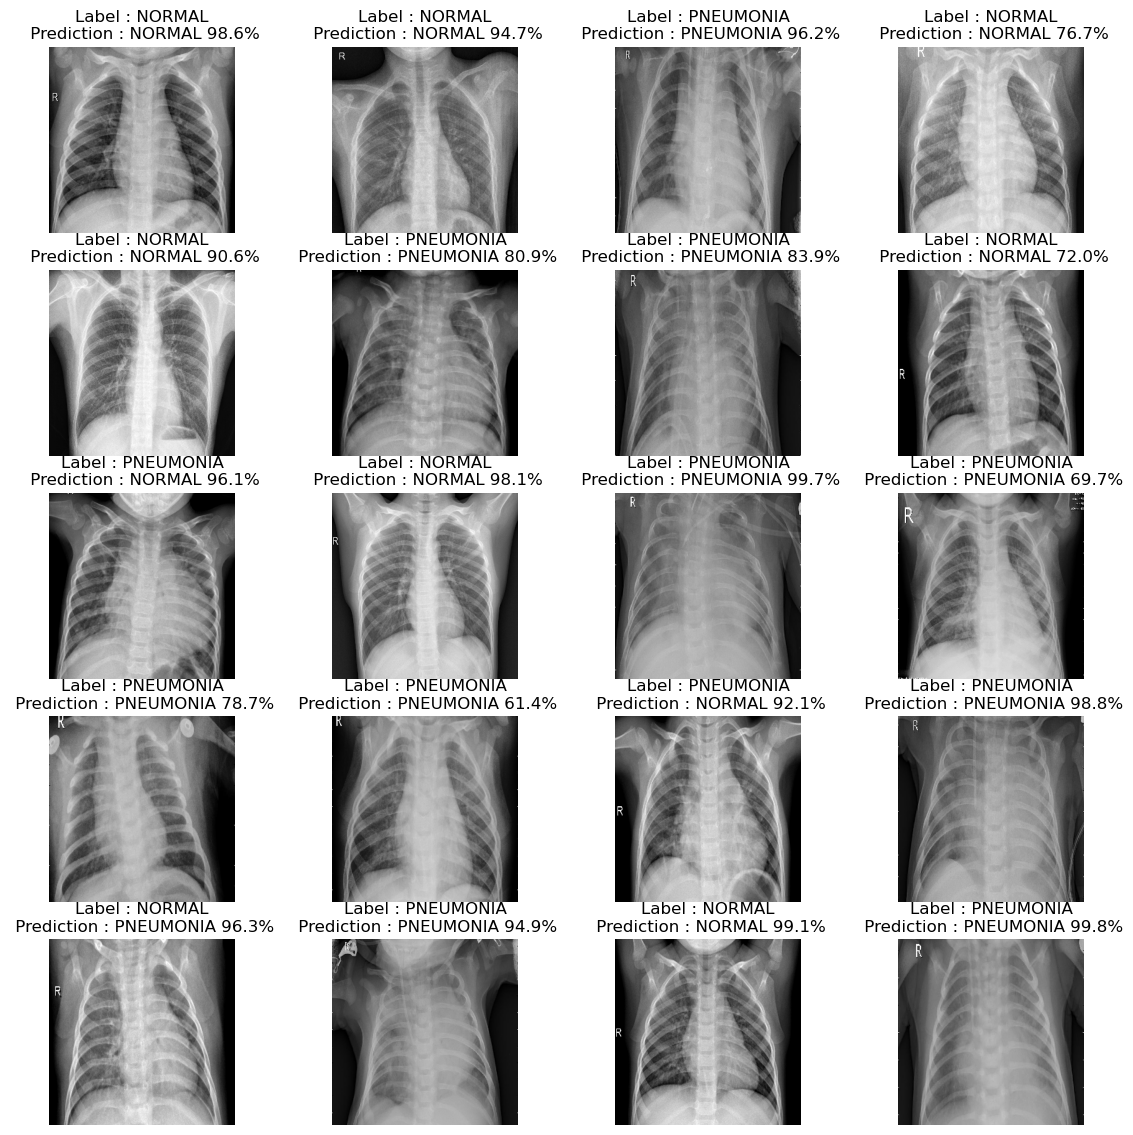

In [22]:
test_generator.reset()
img, label = next(test_generator)

prediction = model_Inception.predict(img)
test_pred_classes = np.argmax(prediction, axis=1)

plt.figure(figsize=[14, 14])
for i in range(20):
    plt.subplot(5, 4, i+1)
    plt.imshow(img[i])
    plt.axis('off')
    plt.title("Label : {}\n Prediction : {} {:.1f}%".format(class_names[np.argmax(label[i])], class_names[test_pred_classes[i]], 100 * np.max(prediction[i])))
plt.show()